<a href="https://colab.research.google.com/github/roshantac/EVA4/blob/master/Assignment12/A/Session12_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install albumentations

     |████████████████████████████████| 634kB 4.7MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654020 sha256=373d56b6103e75d5721193e1dd0456f22084eb6a6918bed09c46a6ef5bb573c5
  Stored in directory: /root/.cache/pip/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9


In [2]:
########################################
#  Calling  heavenly Gods
########################################
import torch
import torchvision
import torchvision.transforms as transforms
from dataset import *
from model import *
import torch.nn as nn
import torch.nn.functional as F
#from base_functions import *
from training import *
from torchsummary import summary
from TinyImgNet import *
# getting the data
trainloader, testloader = getData()



downloads completed
Extraction completed
Starting data loading
Finished data loading, in 0.09723329544067383 seconds


In [3]:
# Utilize GPU if available
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = ResNet18().to(device) #().to(device) # #
if device == 'cuda':
    model = torch.nn.DataParallel(model)
    cudnn.benchmark = True

# Print Model Summary    
summary(model, input_size=(3, 64, 64))


cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           1,728
       BatchNorm2d-2           [-1, 64, 64, 64]             128
            Conv2d-3           [-1, 64, 64, 64]          36,864
       BatchNorm2d-4           [-1, 64, 64, 64]             128
            Conv2d-5           [-1, 64, 64, 64]          36,864
       BatchNorm2d-6           [-1, 64, 64, 64]             128
        BasicBlock-7           [-1, 64, 64, 64]               0
            Conv2d-8           [-1, 64, 64, 64]          36,864
       BatchNorm2d-9           [-1, 64, 64, 64]             128
           Conv2d-10           [-1, 64, 64, 64]          36,864
      BatchNorm2d-11           [-1, 64, 64, 64]             128
       BasicBlock-12           [-1, 64, 64, 64]               0
           Conv2d-13          [-1, 128, 32, 32]          73,728
      BatchNorm2d-14          [-1,


Learning rate search finished. See the graph with {finder_name}.plot()


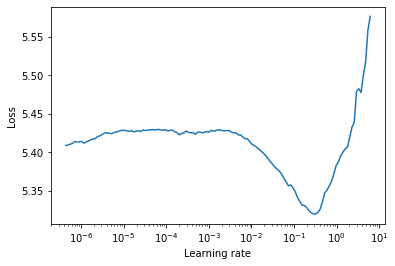

In [4]:
from lr_finder import LRFinder
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-7)
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(trainloader, end_lr=10, num_iter=150)
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

In [5]:
# Training starts here
Training(50,model,device, trainloader, testloader,.3 )


  0%|          | 0/154 [00:00<?, ?it/s]

EPOCH: 0


Loss=4.572817325592041 Batch_id=153 Accuracy=3.65: 100%|██████████| 154/154 [02:13<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -1.7220, Accuracy: 1902/33000 (5.76%)

EPOCH: 1


Loss=4.126331806182861 Batch_id=153 Accuracy=8.55: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -2.7375, Accuracy: 3795/33000 (11.50%)

EPOCH: 2


Loss=3.676119089126587 Batch_id=153 Accuracy=14.22: 100%|██████████| 154/154 [02:13<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -3.6125, Accuracy: 5265/33000 (15.95%)

EPOCH: 3


Loss=3.3737456798553467 Batch_id=153 Accuracy=19.70: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -4.1694, Accuracy: 7348/33000 (22.27%)

EPOCH: 4


Loss=3.100836992263794 Batch_id=153 Accuracy=24.90: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -4.6299, Accuracy: 8412/33000 (25.49%)

EPOCH: 5


Loss=3.0360796451568604 Batch_id=153 Accuracy=29.65: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -5.5544, Accuracy: 9443/33000 (28.62%)

EPOCH: 6


Loss=2.7705154418945312 Batch_id=153 Accuracy=34.36: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -6.3562, Accuracy: 10624/33000 (32.19%)

EPOCH: 7


Loss=2.5982465744018555 Batch_id=153 Accuracy=37.79: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -6.6903, Accuracy: 11806/33000 (35.78%)

EPOCH: 8


Loss=2.4554100036621094 Batch_id=153 Accuracy=41.97: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -7.4933, Accuracy: 12535/33000 (37.98%)

EPOCH: 9


Loss=2.181666612625122 Batch_id=153 Accuracy=44.99: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -7.4024, Accuracy: 12873/33000 (39.01%)

EPOCH: 10


Loss=2.077970266342163 Batch_id=153 Accuracy=47.97: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -8.3191, Accuracy: 13911/33000 (42.15%)

EPOCH: 11


Loss=1.7933039665222168 Batch_id=153 Accuracy=50.82: 100%|██████████| 154/154 [02:13<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -9.0129, Accuracy: 14339/33000 (43.45%)

EPOCH: 12


Loss=1.8058714866638184 Batch_id=153 Accuracy=53.28: 100%|██████████| 154/154 [02:13<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -9.0141, Accuracy: 14742/33000 (44.67%)

EPOCH: 13


Loss=1.6818097829818726 Batch_id=153 Accuracy=56.30: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -9.6099, Accuracy: 14749/33000 (44.69%)

EPOCH: 14


  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -9.8848, Accuracy: 14831/33000 (44.94%)

EPOCH: 15


Loss=1.7891199588775635 Batch_id=153 Accuracy=60.36: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -10.0887, Accuracy: 15364/33000 (46.56%)

EPOCH: 16


Loss=1.4094067811965942 Batch_id=153 Accuracy=63.67: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -10.4460, Accuracy: 15844/33000 (48.01%)

EPOCH: 17


Loss=1.2957484722137451 Batch_id=153 Accuracy=67.07: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -11.2253, Accuracy: 15629/33000 (47.36%)

EPOCH: 18


Loss=1.1612242460250854 Batch_id=153 Accuracy=69.60: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -11.9765, Accuracy: 16210/33000 (49.12%)

EPOCH: 19


Loss=1.0957671403884888 Batch_id=153 Accuracy=72.44: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -12.6583, Accuracy: 16163/33000 (48.98%)

EPOCH: 20


Loss=1.0169967412948608 Batch_id=153 Accuracy=75.11: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -13.2144, Accuracy: 15748/33000 (47.72%)

EPOCH: 21


Loss=0.8514845967292786 Batch_id=153 Accuracy=77.33: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -13.7298, Accuracy: 16143/33000 (48.92%)

EPOCH: 22


Loss=0.767755925655365 Batch_id=153 Accuracy=79.91: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -14.8210, Accuracy: 16715/33000 (50.65%)

EPOCH: 23


Loss=0.6668300628662109 Batch_id=153 Accuracy=82.14: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -15.2044, Accuracy: 16446/33000 (49.84%)

EPOCH: 24


Loss=0.5768060684204102 Batch_id=153 Accuracy=83.84: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -15.8246, Accuracy: 16592/33000 (50.28%)

EPOCH: 25


Loss=0.46612676978111267 Batch_id=153 Accuracy=85.24: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -16.0603, Accuracy: 16667/33000 (50.51%)

EPOCH: 26


Loss=0.5036611557006836 Batch_id=153 Accuracy=87.35: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -16.8602, Accuracy: 16929/33000 (51.30%)

EPOCH: 27


Loss=0.4682525396347046 Batch_id=153 Accuracy=88.60: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -17.0100, Accuracy: 16944/33000 (51.35%)

EPOCH: 28


Loss=0.36770114302635193 Batch_id=153 Accuracy=89.66: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -16.9162, Accuracy: 17041/33000 (51.64%)

EPOCH: 29


Loss=0.2958768606185913 Batch_id=153 Accuracy=90.70: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -18.0521, Accuracy: 17275/33000 (52.35%)

EPOCH: 30


Loss=0.2797479033470154 Batch_id=153 Accuracy=91.65: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -18.5708, Accuracy: 17202/33000 (52.13%)

EPOCH: 31


Loss=0.24417604506015778 Batch_id=153 Accuracy=92.54: 100%|██████████| 154/154 [02:14<00:00,  1.14it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -18.6664, Accuracy: 17416/33000 (52.78%)

EPOCH: 32


Loss=0.2324148714542389 Batch_id=153 Accuracy=93.59: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -18.3542, Accuracy: 17255/33000 (52.29%)

EPOCH: 33


Loss=0.1997646689414978 Batch_id=153 Accuracy=94.07: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -19.2600, Accuracy: 17490/33000 (53.00%)

EPOCH: 34


Loss=0.21961016952991486 Batch_id=153 Accuracy=94.76: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -19.7604, Accuracy: 17633/33000 (53.43%)

EPOCH: 35


Loss=0.19107270240783691 Batch_id=153 Accuracy=95.25: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -20.0214, Accuracy: 17571/33000 (53.25%)

EPOCH: 36


Loss=0.13381007313728333 Batch_id=153 Accuracy=95.75: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -20.2347, Accuracy: 17801/33000 (53.94%)

EPOCH: 37


Loss=0.16023673117160797 Batch_id=153 Accuracy=96.13: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -20.0677, Accuracy: 17733/33000 (53.74%)

EPOCH: 38


Loss=0.11615434288978577 Batch_id=153 Accuracy=96.63: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -20.7242, Accuracy: 17908/33000 (54.27%)

EPOCH: 39


Loss=0.1276596486568451 Batch_id=153 Accuracy=96.95: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -20.7228, Accuracy: 17871/33000 (54.15%)

EPOCH: 40


Loss=0.09765385091304779 Batch_id=153 Accuracy=97.22: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -20.7870, Accuracy: 17938/33000 (54.36%)

EPOCH: 41


Loss=0.07585214823484421 Batch_id=153 Accuracy=97.49: 100%|██████████| 154/154 [02:13<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -21.2915, Accuracy: 17968/33000 (54.45%)

EPOCH: 42


Loss=0.05625173822045326 Batch_id=153 Accuracy=97.74: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -21.7122, Accuracy: 18177/33000 (55.08%)

EPOCH: 43


Loss=0.06202962249517441 Batch_id=153 Accuracy=98.11: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -21.8779, Accuracy: 18235/33000 (55.26%)

EPOCH: 44


Loss=0.07525074481964111 Batch_id=153 Accuracy=98.13: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -21.7147, Accuracy: 18060/33000 (54.73%)

EPOCH: 45


Loss=0.06481344252824783 Batch_id=153 Accuracy=98.35: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -22.0677, Accuracy: 18279/33000 (55.39%)

EPOCH: 46


Loss=0.04380887374281883 Batch_id=153 Accuracy=98.53: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -22.1786, Accuracy: 18343/33000 (55.58%)

EPOCH: 47


Loss=0.051390793174505234 Batch_id=153 Accuracy=98.64: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -22.1302, Accuracy: 18348/33000 (55.60%)

EPOCH: 48


Loss=0.03267448768019676 Batch_id=153 Accuracy=98.65: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]
  0%|          | 0/154 [00:00<?, ?it/s]


Test set: Average loss: -22.1551, Accuracy: 18321/33000 (55.52%)

EPOCH: 49


Loss=0.05438593029975891 Batch_id=153 Accuracy=98.89: 100%|██████████| 154/154 [02:14<00:00,  1.15it/s]



Test set: Average loss: -22.4882, Accuracy: 18370/33000 (55.67%)



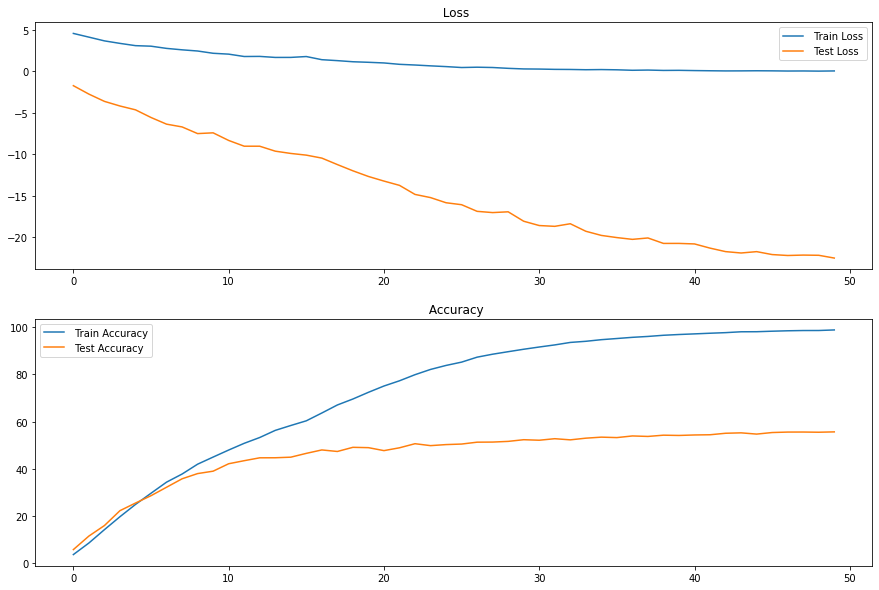

In [8]:
plotPerformanceGraph( )